# Lasso Regression:

### Y = wX + b


Y => Dependent Variable

X => Independent Variable

w => weight

b => bias

#### Gradient Descent:-
    is an optimization algorism used for minimizing the
    loss function in various machine learning algorisms.
    it's used for updating the parameters of learning
    model.

w = w - a * dw

b = b - a * db

#### Learning Rate:-
    is tuning parameter in an optimization algorism that
    determines the step size at each iteration while
    moving toward a minimum of a loss function. 

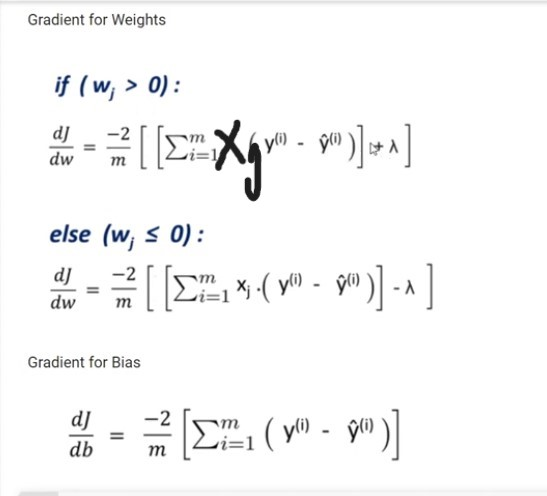
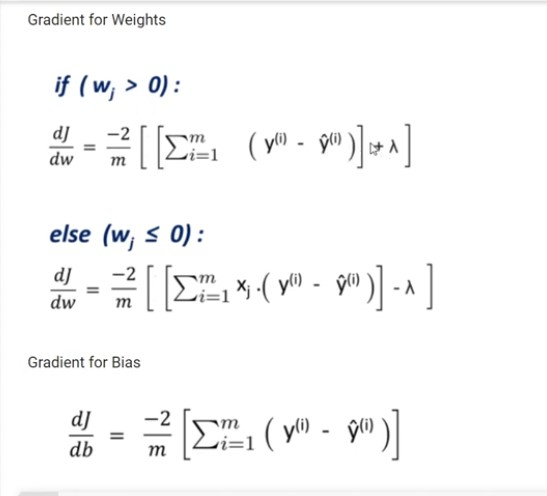

# Buliding  Lasso Regression

In [1]:
## import dependencies
import numpy as np

class Lasso_regression():
    
    # initiating the hyperparameters
    def __init__(self, learning_rate, no_of_iterations, lamda_parameter):
        self.learning_rate = learning_rate
        self.no_of_iterations = no_of_iterations
        self.lamda_parameter = lamda_parameter
    def fit(self,X,Y):
         #number of training examples and number of features
        self.m,self.n = X.shape#number of rows and columns

        #initating the weight and bias
        self.w = np.zeros(self.n)
        self.b = 0
        self.X = X
        self.Y = Y

        for i in range(self.no_of_iterations):
            self.update_wights()

    
    def update_wights(self):

        # linear equation of model
        Y_prediction = self.predict(self.X)

        # gradient dw
        dw = np.zeros(self.n)
        for i in range(self.n):

            if self.w[i] > 0:
                dw[i] = (-(2*(self.X[:,i]).dot(self.Y - Y_prediction)) + self.lamda_parameter)/self.m
            else:
                dw[i] = (-(2*(self.X[:,i]).dot(self.Y - Y_prediction)) - self.lamda_parameter)/self.m

        # gradient db
        db = (-2 * np.sum(self.Y - Y_prediction)) / self.m

        # updating weight & bias
        self.w = self.w - self.learning_rate * dw
        self.b = self.b - self.learning_rate * db   
    


    
    def predict(self,X):

        return X.dot(self.w)+ self.b

# Using Linear Regression


## Importing The Dependencies¶


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings

warnings.filterwarnings(action="ignore")

## Data Preprocessing

## loading the data

In [3]:

df = pd.read_csv('/kaggle/input/salary-data-dataset-for-linear-regression/Salary_Data.csv')

## display first 5 rows


In [4]:
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


## display last 5 rows


In [5]:
df.tail()

,YearsExperience,Salary
25,9.0,105582
26,9.5,116969
27,9.6,112635
28,10.3,122391
29,10.5,121872


## display random 5 rows


In [6]:
df.sample(5)

,YearsExperience,Salary
18,5.9,81363
10,3.9,63218
0,1.1,39343
13,4.1,57081
8,3.2,64445


## display number of rows and columns in dataframe


In [7]:
print("The Shape of DataFrame is: ",df.shape)

The Shape of DataFrame is:  (30, 2)


## some statistical measures

In [8]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [9]:
df.skew()

YearsExperience    0.37956
Salary             0.35412
dtype: float64

In [10]:
df.kurt()


YearsExperience   -1.012212
Salary            -1.295421
dtype: float64

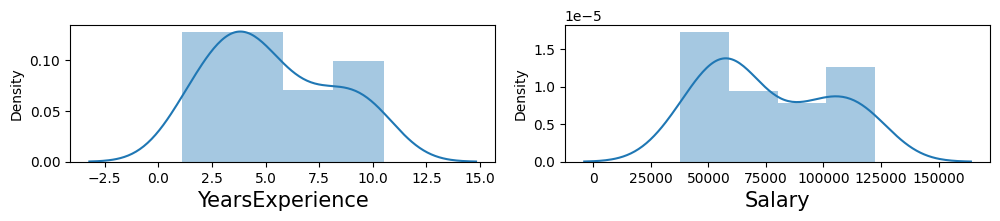

In [11]:
plt.figure(figsize=(20,40))
plotnum = 1
for columns in df:
    if plotnum <= len(df.columns) :
        ax=plt.subplot(20,4,plotnum)
        sns.distplot(df[columns])
        plt.xlabel(columns,fontsize=15)
    plotnum += 1
plt.tight_layout() 
plt.show()

<Axes: >

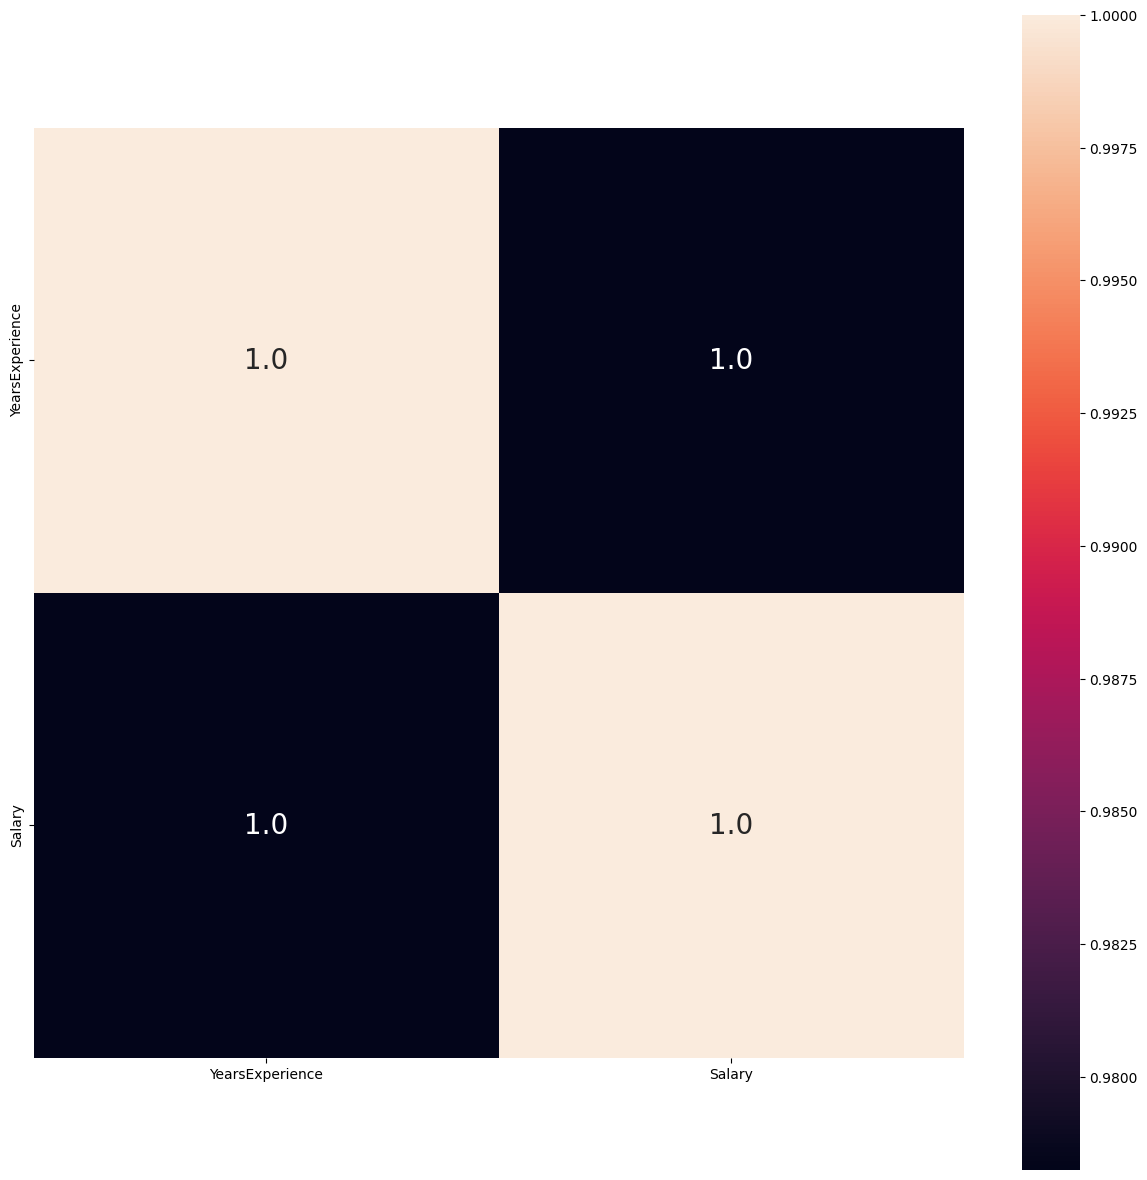

In [12]:
corr=df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr,fmt='.1f',cbar=True,square=True,annot=True,annot_kws={'size':20})

## show some informations about dataframe¶


In [13]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 612.0 bytes


In [14]:
print("The Number of Null in DataFrame is: ",df.isnull().sum().sum())
print("The Number of NAN in DataFrame is: ",df.isna().sum().sum())
print("The Number of duplicated in DataFrame is: ",df.duplicated().sum().sum())

The Number of Null in DataFrame is:  0
The Number of NAN in DataFrame is:  0
The Number of duplicated in DataFrame is:  0


## Separating the data

In [15]:
features = df.iloc[:,:-1].values
target = df.iloc[:,-1].values

In [16]:
scaler = StandardScaler()


In [17]:
standerized_features = scaler.fit_transform(features)

In [18]:
standerized_features.std()

1.0

## Train Test split

In [19]:
X_train,X_test,Y_train,Y_test=train_test_split(standerized_features,target,test_size=0.2,random_state=11)

## Train the Model


In [20]:
model = Lasso_regression(learning_rate=0.01,no_of_iterations=10000,lamda_parameter=0.01)


In [21]:
model.fit(X_train,Y_train)

In [22]:
## printing values of weights & bias
print('The weights is: ',model.w[0])
print('The bias is: ',model.b)

The weights is:  26520.698894060224
The bias is:  75878.44553679679


In [23]:
Y_train_pred = model.predict(X_train)

In [24]:
Y_test_pred = model.predict(X_test)

## visualize predictions

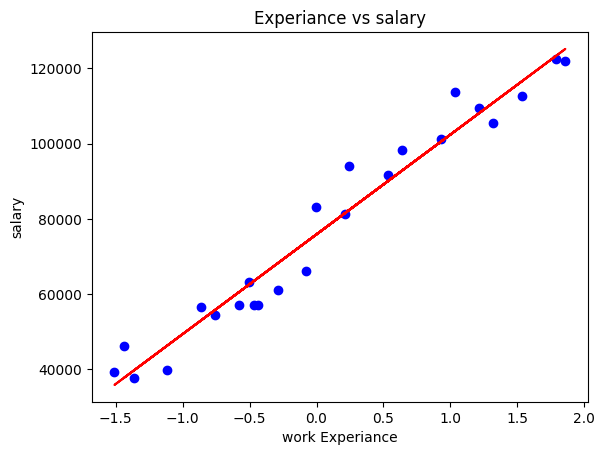

In [25]:
plt.scatter(X_train,Y_train,color='b')
plt.plot(X_train,Y_train_pred,color='r')
plt.xlabel("work Experiance")
plt.ylabel("salary")
plt.title("Experiance vs salary")
plt.show()

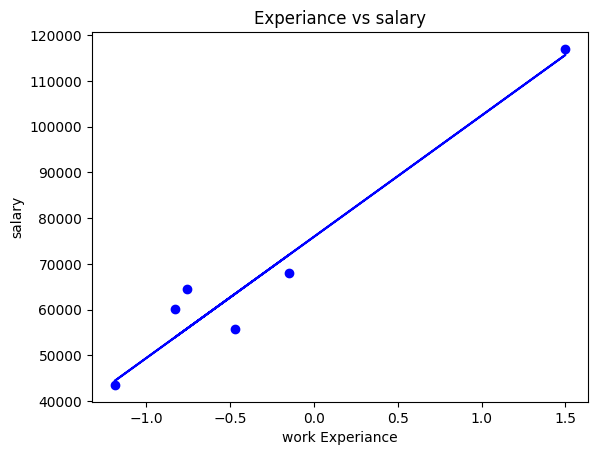

In [26]:
plt.scatter(X_test,Y_test,color='b')
plt.plot(X_test,Y_test_pred,color='b')
plt.xlabel("work Experiance")
plt.ylabel("salary")
plt.title("Experiance vs salary")
plt.show()

## Lasso Regression By clude Ai


In [27]:
import numpy as np

class Lasso:
    def __init__(self, alpha=1.0, max_iter=1000, tol=1e-4, fit_intercept=True):
        self.alpha = alpha
        self.max_iter = max_iter
        self.tol = tol
        self.fit_intercept = fit_intercept
        self.coef_ = None
        self.intercept_ = None
        self.n_iter_ = 0
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        
        if self.fit_intercept:
            X_centered = X - np.mean(X, axis=0)
            y_centered = y - np.mean(y)
        else:
            X_centered = X
            y_centered = y
        
        self.coef_ = np.zeros(n_features)
        
        for i in range(self.max_iter):
            coef_old = self.coef_.copy()
            
            for j in range(n_features):
                residual = y_centered - X_centered @ self.coef_ + self.coef_[j] * X_centered[:, j]
                rho = X_centered[:, j] @ residual
                
                if rho < -self.alpha / 2:
                    self.coef_[j] = (rho + self.alpha / 2) / (X_centered[:, j] @ X_centered[:, j])
                elif rho > self.alpha / 2:
                    self.coef_[j] = (rho - self.alpha / 2) / (X_centered[:, j] @ X_centered[:, j])
                else:
                    self.coef_[j] = 0
            
            if np.sum(np.abs(self.coef_ - coef_old)) < self.tol:
                break
        
        self.n_iter_ = i + 1
        
        if self.fit_intercept:
            self.intercept_ = np.mean(y) - np.mean(X, axis=0) @ self.coef_
        else:
            self.intercept_ = 0
        
        return self
    
    def predict(self, X):
        return X @ self.coef_ + self.intercept_
    
    def score(self, X, y):
        y_pred = self.predict(X)
        ss_res = np.sum((y - y_pred) ** 2)
        ss_tot = np.sum((y - np.mean(y)) ** 2)
        return 1 - (ss_res / ss_tot)

In [28]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, Y_train)


y_pred_test = lasso.predict(X_test)
score = lasso.score(X_test, Y_test)

print(f"model:")
print(f"R² Score: {score:.4f}")
print(f"nuber of iterations : {lasso.n_iter_}")
print(f"cofficent : {np.sum(lasso.coef_ != 0)}")

print()

y_pred_train = lasso.predict(X_train)
score_our = lasso.score(X_train, Y_train)

print(f"model:")
print(f"R² Score: {score:.4f}")
print(f"nuber of iterations : {lasso.n_iter_}")
print(f"cofficent : {np.sum(lasso.coef_ != 0)}")


print()


model:
R² Score: 0.9409
nuber of iterations : 2
cofficent : 1

model:
R² Score: 0.9409
nuber of iterations : 2
cofficent : 1



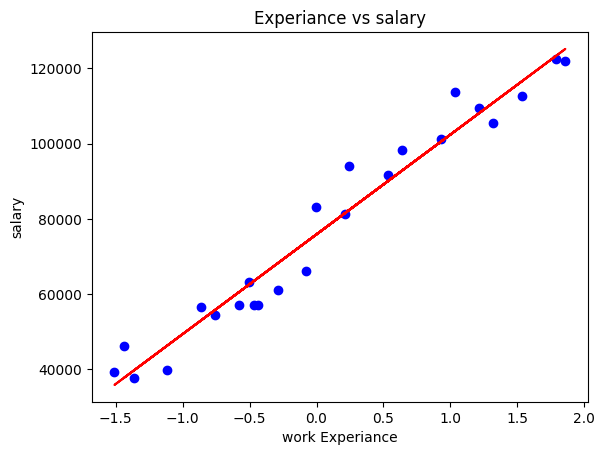

In [29]:
plt.scatter(X_train,Y_train,color='b')
plt.plot(X_train,y_pred_train,color='r')
plt.xlabel("work Experiance")
plt.ylabel("salary")
plt.title("Experiance vs salary")
plt.show()

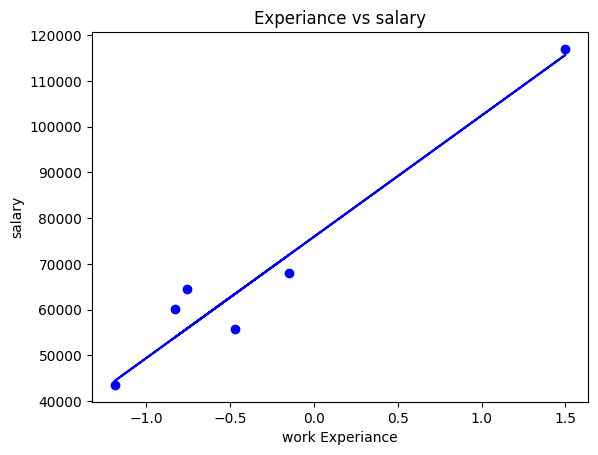

In [30]:
plt.scatter(X_test,Y_test,color='b')
plt.plot(X_test,y_pred_test,color='b')
plt.xlabel("work Experiance")
plt.ylabel("salary")
plt.title("Experiance vs salary")
plt.show()

# Thank You

# Made By: Ali Osama